In [1]:
import pandas as pd
import datatable
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

def adjusted_r2(model, x, y):
    yhat = model.predict(x)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared

def get_metric(model, X_train, y_train, X_test, y_test):
    print('Train set Adjusted R^2: {}'.format(adjusted_r2(model, X_train, y_train)))
    print("Train set Multiple Correlation: {}".format(np.power(model.score(X_train, y_train), 1/2)))
    print('Validation set Adjusted R^2: {}'.format(adjusted_r2(model, X_test, y_test)))
    print("Validation set Multiple Correlation: {}".format(np.power(model.score(X_test, y_test), 1/2)))
    print('Train set SEE: {}'.format(np.std(model.predict(X_train) - y_train)))
    print('Validation set SEE: {}'.format(np.std(model.predict(X_test) - y_test)))
    print('MSE Train set score: {}'.format(mean_squared_error(model.predict(X_train), y_train)))
    print('MSE Validation set score: {}'.format(mean_squared_error(model.predict(X_test), y_test)))
    return None

In [3]:
DATA_PATH = '../Data/'
df_source = datatable.fread(os.path.join(DATA_PATH, 'pred_final.csv')
                            , encoding='utf-8-sig', na_strings=['', 'NA']).to_pandas()
print(df_source.shape)
df_source.head()

(8620, 35)


,sm_date,hpcid,cdw_no,gend_cd,age,percentage_fat,height,weight,bmi,phy_active,resting_heart_rate,VO2max,muscle_mass,waist_hip_ratio,ecw/tbw,muscle_mass(RA),muscle_mass(LA),muscle_mass(BODY),muscle_mass(RL),muscle_mass(LL),fat_mass,tbw,lean_body_mass,sbp,dbp,alc_ys,current_smk,max_heart_rate,phy_new,mbp,limb_muscle_mass,CRF(METs),death_date,surv_years,death
0,2014-04-10,293E4800393912,F1F7E4E13501,False,55,30.3,156.2,58.4,23.9,0.0,70.0,23.45,38.4,0.85,0.339,2.04,2.05,18.22,6.38,6.19,17.7,30.0,40.7,104.0,72.0,True,0.0,161.0,1080.0,88.0,16.66,6.7,NaN,5.188334,False
1,2014-09-02,1F29531A3F251C,FB93B2E3876D,False,54,35.6,156.7,59.0,24.0,1.0,68.0,22.05,35.8,0.91,0.326,1.92,1.88,17.75,5.71,5.74,21.0,27.8,38.0,128.0,81.0,False,0.0,166.0,420.0,104.5,15.25,6.3,NaN,4.791337,False
2,2011-10-10,114A1C2E3F4D44,158F02FB30AB,False,52,26.2,167.2,51.7,18.5,0.0,69.0,25.90,35.9,0.84,0.338,1.74,1.62,16.83,6.40,6.36,13.6,28.0,38.1,92.0,67.0,False,0.0,135.0,1080.0,79.5,16.12,7.4,NaN,7.688043,False
3,2012-06-29,3D22284744071C,2E159F6A824B,False,55,31.4,159.5,61.8,24.3,0.0,58.0,25.55,40.1,0.90,0.339,2.33,2.23,19.69,6.30,6.25,19.4,31.3,42.4,124.0,72.0,True,0.0,119.0,525.0,98.0,17.11,7.3,NaN,6.967973,False
4,2012-11-05,295C261F44574E,1EB51FE0009F,False,58,31.2,164.9,65.6,24.1,0.0,64.0,28.35,42.6,0.89,0.338,2.32,2.27,20.23,7.24,7.30,20.4,33.2,45.2,124.0,74.0,False,0.0,162.0,630.0,99.0,19.13,8.1,NaN,6.614783,False


In [4]:
columns_to_use = ['cdw_no', 'sm_date', 'gend_cd', 'age', 'percentage_fat', 'bmi',
                  'phy_active', 'resting_heart_rate', 'VO2max', 'CRF(METs)','alc_ys',
                  'current_smk', 'surv_years', 'death']
df_source = df_source.loc[df_source['VO2max'].notnull(), columns_to_use]

In [5]:
df_source['visit_num'] = df_source.groupby(['cdw_no'])['sm_date'].apply(pd.Series.rank)
df_source.head()

,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,visit_num
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,1.0
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,1.0
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,1.0
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,1.0
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,1.0


In [6]:
df_selected = df_source[(df_source['visit_num'] == 1) & (df_source['gend_cd'] == 1)]
df_selected = df_selected.drop(columns=['gend_cd', 'visit_num']).dropna().reset_index(drop=True)

#### Print Case num
print("Case(N) = {}".format(len(df_selected)))

Case(N) = 6386


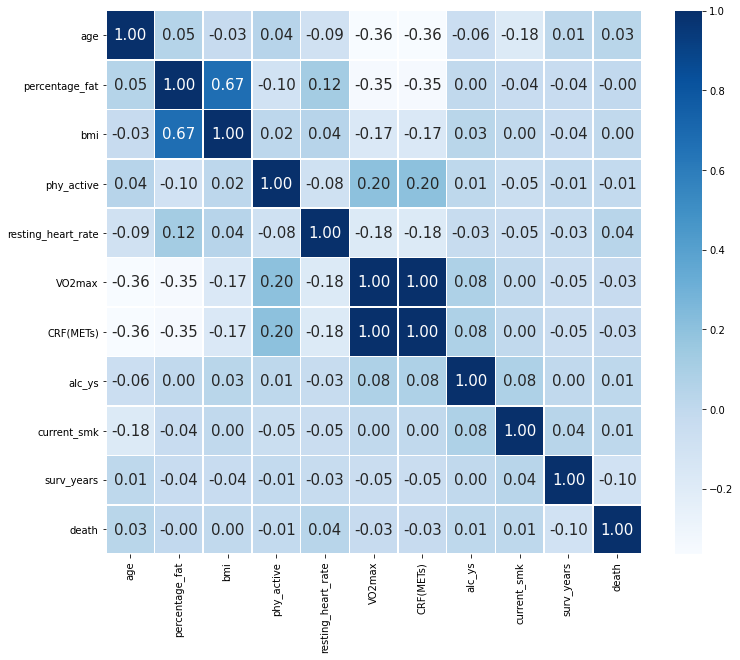

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', annot_kws={'size':15})
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
#### Male
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=['VO2max']),
                                                    df_selected['VO2max'], random_state=1004,
                                                    test_size=0.2)
print("Train set size = {}".format(len(X_train)))
print("Test set size = {}".format(len(X_test)))

Train set size = 5108
Test set size = 1278


In [9]:
X_train.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,CRF(METs),alc_ys,current_smk,surv_years,death
1825,80F815BFC4EB,2013-05-14,44,20.5,23.2,1.0,68.0,10.4,True,1.0,6.094581,False
4698,88A53DDC7203,2015-03-26,54,28.0,24.5,0.0,66.0,8.1,True,0.0,4.230066,False
1428,C2587FD50DF9,2013-07-04,52,14.5,21.3,1.0,56.0,10.1,True,1.0,5.954948,False
3116,B898D55BCF15,2012-08-16,50,14.3,24.5,0.0,58.0,11.4,True,0.0,6.836554,False
4695,8377CA9BE0CB,2015-09-07,47,22.8,24.1,0.0,70.0,9.7,True,0.0,3.778312,False


#### Age, BMI, Resting_heart_Rate, Phy_Active

In [10]:
column_mask = ['age', 'bmi', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.21017723 -0.26896311 -0.0978962   2.20876495]
55.62199903931731
Train set Adjusted R^2: 0.24738100564544196
Train set Multiple Correlation: 0.4979663502307593
Validation set Adjusted R^2: 0.25134251087593307
Validation set Multiple Correlation: 0.503674063003458
Train set SEE: 3.364729885038255
Validation set SEE: 3.243769192425903
MSE Train set score: 11.321407199269549
MSE Validation set score: 10.534344936799554


#### Age, BMI, Phy_Active

In [11]:
column_mask = ['age', 'bmi', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.20122698 -0.28071994  2.39180097]
49.37324298476017
Train set Adjusted R^2: 0.21017203538299611
Train set Multiple Correlation: 0.4589509813143626
Validation set Adjusted R^2: 0.22252912613065734
Validation set Multiple Correlation: 0.4736619092765379
Train set SEE: 3.447239202720895
Validation set SEE: 3.308195257125795
MSE Train set score: 11.883458120775792
MSE Validation set score: 10.948371209893178


#### Age, BMI, Resting_heart_Rate

In [12]:
column_mask = ['age', 'bmi', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.20674496 -0.25990416 -0.10630376]
56.06572418994404
Train set Adjusted R^2: 0.2088131804009149
Train set Multiple Correlation: 0.45746906616533745
Validation set Adjusted R^2: 0.192808045402876
Validation set Multiple Correlation: 0.44125315409749455
Train set SEE: 3.4502033198056394
Validation set SEE: 3.368838130852085
MSE Train set score: 11.903902947997858
MSE Validation set score: 11.366904476544715


#### Age, Percentage_fat, Resting_heart_Rate, Phy_Active

In [13]:
column_mask = ['age', 'percentage_fat', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.1989263  -0.24920673 -0.0833491   1.88257271]
53.20741167588491
Train set Adjusted R^2: 0.30045192807391574
Train set Multiple Correlation: 0.5486345242424594
Validation set Adjusted R^2: 0.3012697716480046
Validation set Multiple Correlation: 0.5508706139261
Train set SEE: 3.243929447482476
Validation set SEE: 3.132436189676779
MSE Train set score: 10.523078260243963
MSE Validation set score: 9.831819423646806


#### Age, Percentage_fat, Phy_Active

In [14]:
column_mask = ['age', 'percentage_fat', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.19072112 -0.26667603  2.01524709]
48.006434953166355
Train set Adjusted R^2: 0.2738762013698861
Train set Multiple Correlation: 0.5237391980371313
Validation set Adjusted R^2: 0.2804652776870128
Validation set Multiple Correlation: 0.53118325368953
Train set SEE: 3.3052970980752594
Validation set SEE: 3.181478551385929
MSE Train set score: 10.92498890654473
MSE Validation set score: 10.13251235905964


#### Age, Percentage_fat, Resting_heart_Rate

In [15]:
column_mask = ['age', 'percentage_fat', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.19569654 -0.26158101 -0.08949431]
53.97029089172562
Train set Adjusted R^2: 0.27264295265378236
Train set Multiple Correlation: 0.5225612148739678
Validation set Adjusted R^2: 0.2592474036154495
Validation set Multiple Correlation: 0.51086947564722
Train set SEE: 3.3081027657184174
Validation set SEE: 3.225765126846761
MSE Train set score: 10.94354390855384
MSE Validation set score: 10.431303181234245


In [16]:
df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF
0,73E374A3BBB5,2015-12-15,60,20.1,20.4,0.0,69.0,34.65,9.9,True,0.0,3.507259,False,30.769680,8.791337,31.572937,9.020839,31.024022,8.864006,30.511691,8.717626,31.202980,8.915137,30.795612,8.798746
1,84B9BCA08BC1,2011-11-17,53,21.6,24.3,0.0,53.0,36.40,10.4,True,0.0,7.584002,False,32.758304,9.359515,31.886719,9.110491,33.158471,9.473849,32.863950,9.389700,32.138013,9.182290,33.205026,9.487150
2,DE350F7E8DD5,2011-01-27,63,22.4,23.5,0.0,51.0,28.70,8.2,True,0.0,8.388947,False,31.067494,8.876427,30.099025,8.599721,31.511552,9.003301,30.842020,8.812006,30.017461,8.576418,31.217784,8.919367
3,1ADDEE1A387F,2013-09-06,49,25.9,28.4,0.0,68.0,31.85,9.1,False,0.0,5.779722,False,31.027821,8.865092,31.540675,9.011621,31.325287,8.950082,31.337830,8.953666,31.754191,9.072626,31.520599,9.005885
4,2A3D6EB266EB,2013-07-18,51,23.3,23.9,0.0,60.0,32.90,9.4,True,1.0,5.916617,False,32.600970,9.314563,32.401460,9.257560,32.931796,9.409085,32.254708,9.215631,32.066106,9.161745,32.525271,9.292935


In [17]:
df_selected['CRF_tertile'] = pd.qcut(df_selected['CRF(METs)'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['CRF_tertile_nm'] = pd.qcut(df_selected['CRF(METs)'], q=3)

#### BMI
df_selected['ABRP_CRF_tertile'] = pd.qcut(df_selected['ABRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['ABRP_CRF_tertile_nm'] = pd.qcut(df_selected['ABRP_CRF'], q=3)

#### Percentage Fat
df_selected['APRP_CRF_tertile'] = pd.qcut(df_selected['APRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['APRP_CRF_tertile_nm'] = pd.qcut(df_selected['APRP_CRF'], q=3)

In [18]:
df_selected['CRF_qualtile'] = pd.qcut(df_selected['CRF(METs)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['CRF_qualtile_nm'] = pd.qcut(df_selected['CRF(METs)'], q=4)

#### BMI
df_selected['ABRP_CRF_qualtile'] = pd.qcut(df_selected['ABRP_CRF'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['ABRP_CRF_qualtile_nm'] = pd.qcut(df_selected['ABRP_CRF'], q=4)

#### Percentage Fat
df_selected['APRP_CRF_qualtile'] = pd.qcut(df_selected['APRP_CRF'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['APRP_CRF_qualtile_nm'] = pd.qcut(df_selected['APRP_CRF'], q=4)

In [19]:
print(df_selected['age'].min())
print(df_selected['age'].max())

18
72


In [20]:
def age_split(x):
    if x < 40:
        return 'low'
    elif (x >= 40) & (x < 50):
        return 'middle'
    else: return 'high'

df_selected['age_split'] = df_selected['age'].apply(age_split)

In [21]:
df_selected['CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['CRF(METs)'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))
df_selected['ABRP_CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['ABRP_CRF'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))

df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,CRF_qualtile,CRF_qualtile_nm,ABRP_CRF_qualtile,ABRP_CRF_qualtile_nm,APRP_CRF_qualtile,APRP_CRF_qualtile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj
0,73E374A3BBB5,2015-12-15,60,20.1,20.4,0.0,69.0,34.65,9.9,True,0.0,3.507259,False,30.769680,8.791337,31.572937,9.020839,31.024022,8.864006,30.511691,8.717626,31.202980,8.915137,30.795612,8.798746,T2,"(9.0, 9.9]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q3,"(9.4, 10.2]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",high,T3,T1
1,84B9BCA08BC1,2011-11-17,53,21.6,24.3,0.0,53.0,36.40,10.4,True,0.0,7.584002,False,32.758304,9.359515,31.886719,9.110491,33.158471,9.473849,32.863950,9.389700,32.138013,9.182290,33.205026,9.487150,T3,"(9.9, 13.0]",T2,"(9.195, 9.656]",T2,"(9.179, 9.68]",Q4,"(10.2, 13.0]",Q2,"(9.081, 9.412]",Q2,"(9.043, 9.419]",high,T3,T3
2,DE350F7E8DD5,2011-01-27,63,22.4,23.5,0.0,51.0,28.70,8.2,True,0.0,8.388947,False,31.067494,8.876427,30.099025,8.599721,31.511552,9.003301,30.842020,8.812006,30.017461,8.576418,31.217784,8.919367,T1,"(6.7989999999999995, 9.0]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q1,"(6.7989999999999995, 8.7]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",high,T1,T1
3,1ADDEE1A387F,2013-09-06,49,25.9,28.4,0.0,68.0,31.85,9.1,False,0.0,5.779722,False,31.027821,8.865092,31.540675,9.011621,31.325287,8.950082,31.337830,8.953666,31.754191,9.072626,31.520599,9.005885,T2,"(9.0, 9.9]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q2,"(8.7, 9.4]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",middle,T1,T1
4,2A3D6EB266EB,2013-07-18,51,23.3,23.9,0.0,60.0,32.90,9.4,True,1.0,5.916617,False,32.600970,9.314563,32.401460,9.257560,32.931796,9.409085,32.254708,9.215631,32.066106,9.161745,32.525271,9.292935,T2,"(9.0, 9.9]",T2,"(9.195, 9.656]",T2,"(9.179, 9.68]",Q2,"(8.7, 9.4]",Q2,"(9.081, 9.412]",Q2,"(9.043, 9.419]",high,T2,T3


In [22]:
print(df_selected['CRF(METs)'].max())
print(df_selected['CRF(METs)'].min())

13.0
6.8


In [23]:
df_selected['CRF_1_METs'] = df_selected['CRF(METs)'].astype(int)
df_selected['ABRP_CRF_1_METs'] = df_selected['ABRP_CRF'].astype(int)

##Change Data type to int
df_selected['alc_ys'] = df_selected['alc_ys'].astype(int)

df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,CRF_qualtile,CRF_qualtile_nm,ABRP_CRF_qualtile,ABRP_CRF_qualtile_nm,APRP_CRF_qualtile,APRP_CRF_qualtile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj,CRF_1_METs,ABRP_CRF_1_METs
0,73E374A3BBB5,2015-12-15,60,20.1,20.4,0.0,69.0,34.65,9.9,1,0.0,3.507259,False,30.769680,8.791337,31.572937,9.020839,31.024022,8.864006,30.511691,8.717626,31.202980,8.915137,30.795612,8.798746,T2,"(9.0, 9.9]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q3,"(9.4, 10.2]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",high,T3,T1,9,8
1,84B9BCA08BC1,2011-11-17,53,21.6,24.3,0.0,53.0,36.40,10.4,1,0.0,7.584002,False,32.758304,9.359515,31.886719,9.110491,33.158471,9.473849,32.863950,9.389700,32.138013,9.182290,33.205026,9.487150,T3,"(9.9, 13.0]",T2,"(9.195, 9.656]",T2,"(9.179, 9.68]",Q4,"(10.2, 13.0]",Q2,"(9.081, 9.412]",Q2,"(9.043, 9.419]",high,T3,T3,10,9
2,DE350F7E8DD5,2011-01-27,63,22.4,23.5,0.0,51.0,28.70,8.2,1,0.0,8.388947,False,31.067494,8.876427,30.099025,8.599721,31.511552,9.003301,30.842020,8.812006,30.017461,8.576418,31.217784,8.919367,T1,"(6.7989999999999995, 9.0]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q1,"(6.7989999999999995, 8.7]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",high,T1,T1,8,8
3,1ADDEE1A387F,2013-09-06,49,25.9,28.4,0.0,68.0,31.85,9.1,0,0.0,5.779722,False,31.027821,8.865092,31.540675,9.011621,31.325287,8.950082,31.337830,8.953666,31.754191,9.072626,31.520599,9.005885,T2,"(9.0, 9.9]",T1,"(7.6419999999999995, 9.195]",T1,"(7.547, 9.179]",Q2,"(8.7, 9.4]",Q1,"(7.6419999999999995, 9.081]",Q1,"(7.547, 9.043]",middle,T1,T1,9,8
4,2A3D6EB266EB,2013-07-18,51,23.3,23.9,0.0,60.0,32.90,9.4,1,1.0,5.916617,False,32.600970,9.314563,32.401460,9.257560,32.931796,9.409085,32.254708,9.215631,32.066106,9.161745,32.525271,9.292935,T2,"(9.0, 9.9]",T2,"(9.195, 9.656]",T2,"(9.179, 9.68]",Q2,"(8.7, 9.4]",Q2,"(9.081, 9.412]",Q2,"(9.043, 9.419]",high,T2,T3,9,9


In [24]:
df_selected.to_csv(os.path.join(DATA_PATH, 'ACM_dataset_M.csv'), index=False, encoding='utf-8-sig')

In [25]:
display(df_selected['CRF_1_METs'].value_counts())
display(df_selected['ABRP_CRF_1_METs'].value_counts())

display(df_selected['death'].value_counts())

9     2286
8     1631
10    1396
7      464
11     453
12     128
6       24
13       4
Name: CRF_1_METs, dtype: int64

9     4110
8     1284
10     931
11      50
7        9
12       2
Name: ABRP_CRF_1_METs, dtype: int64

False    6361
True       25
Name: death, dtype: int64